<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Delivery_time -> Predict delivery time using sorting time

In [29]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [30]:
# import dataset
df1=pd.read_csv('/content/delivery_time.csv')
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA and Data Visualization


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [32]:
import plotly.figure_factory as ff

# Create a histogram
hist_data = [df1['Delivery Time']]

# Group labels
group_labels = ['Delivery Time']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=True)

fig.update_layout(
    title="Delivery Time Distribution",
    xaxis_title="Delivery Time",
    yaxis_title="Density"
)
fig.show()


In [33]:
# Create a histogram
hist_data = [df1['Sorting Time']]

# Group labels
group_labels = ['Sorting Time']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=True)

fig.update_layout(
    title="Sorting Time Distribution",
    xaxis_title="Sorting Time",
    yaxis_title="Density"
)

fig.show()

Feature Engineering

In [34]:
# Renaming Columns
df1=df1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Correlation Analysis

In [35]:
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [37]:
import plotly.graph_objects as go

# Create a scatter plot with regression line
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df1['sorting_time'],
    y=df1['delivery_time'],
    mode='markers',
    marker=dict(color='blue'),
    name='Data'
))

# Fit a linear regression line
m, b = np.polyfit(df1['sorting_time'], df1['delivery_time'], 1)
x_fit = np.linspace(df1['sorting_time'].min(), df1['sorting_time'].max(), 100)
y_fit = m * x_fit + b

fig.add_trace(go.Scatter(
    x=x_fit,
    y=y_fit,
    mode='lines',
    marker=dict(color='red'),
    name='Regression Line'
))
fig.update_layout(
    title="Sorting Time vs Delivery Time",
    xaxis_title="Sorting Time",
    yaxis_title="Delivery Time"
)
fig.show()


Model Building

In [38]:
model=smf.ols("delivery_time~sorting_time",data=df1).fit()

Model Testing

In [39]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [40]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [41]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model Predictions

In [42]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [43]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [44]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [45]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

#2) Salary_hike -> Build a prediction model for Salary_hike


In [46]:
# import dataset
df2=pd.read_csv('/content/Salary_Data.csv')
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Data Visualization

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [49]:
# Create a histogram
hist_data = [df2['YearsExperience']]

# Group labels
group_labels = ['YearsExperience']

# Create figure
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=True)

# Update layout
fig.update_layout(
    title="Years of Experience Distribution",
    xaxis_title="Years of Experience",
    yaxis_title="Density"
)

fig.show()

<ipython-input-51-122a0bd7de0e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Salary', ylabel='Density'>

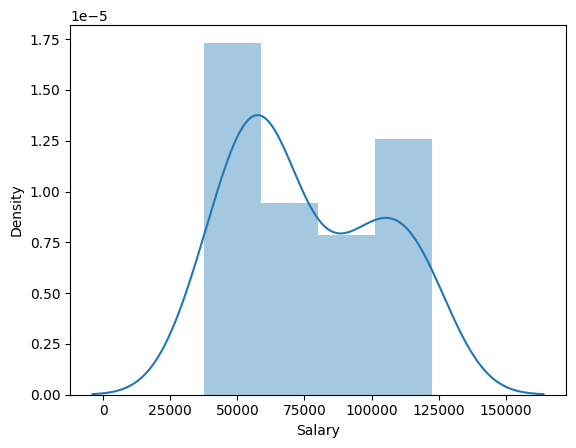

In [51]:
sns.distplot(df2['Salary'])

Correlation Analysis

In [52]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [54]:
# Create a scatter plot with regression line
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df2['YearsExperience'],
    y=df2['Salary'],
    mode='markers',
    marker=dict(color='blue'),
    name='Data'
))

# Fit a linear regression line
m, b = np.polyfit(df2['YearsExperience'], df2['Salary'], 1)
x_fit = np.linspace(df2['YearsExperience'].min(), df2['YearsExperience'].max(), 100)
y_fit = m * x_fit + b

fig.add_trace(go.Scatter(
    x=x_fit,
    y=y_fit,
    mode='lines',
    marker=dict(color='red'),
    name='Regression Line'
))

# Update layout
fig.update_layout(
    title="Years of Experience vs Salary",
    xaxis_title="Years of Experience",
    yaxis_title="Salary"
)

fig.show()

Model Building

In [57]:
model2=smf.ols("Salary~YearsExperience",data=df2).fit()

Model Testing

In [58]:
# Finding Cefficient Parameters
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [59]:
# Finding Pvalues and tvalues
model2.tvalues, model2.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [60]:
# Finding Rsquared values
model2.rsquared , model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model Predictions

In [61]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [62]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [63]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [64]:
model2.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64